In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [172]:
data = pd.read_csv('../data/INvideos_cc50.csv')

C:\Users\rodri\AppData\Local\Temp\ipykernel_10988\242698420.py:1: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/INvideos_cc50.csv')


In [173]:
categories = pd.read_json('../data/IN_category_id.json')

## Inspeccionar los Datos

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [175]:
data.describe()

,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


In [176]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


Observaciones:

* trending_date está en formato año, dia, mes
* Es necesario convertir a dato booleano o numérico los campos con categorías verdadero o falso

In [177]:
categories = pd.read_json('../data/IN_category_id.json')

In [178]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [179]:
categories = pd.json_normalize(categories['items'])

In [180]:
categories.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [181]:
# Creamos variables ficticias para las caracteristicas "Sex" y "Embarked"
#sex = pd.get_dummies(data['Sex'],drop_first=True)
#embark = pd.get_dummies(data['Embarked'],drop_first=True)

##  Pre-Procesar los Datos

In [182]:
# a fecha: trending_date , publish_time | yyyy-mm-dd 
# con hora: publish_time
# separar en 2 columnas float: geometry
# VERDADERO |	FALSO	boolean : ratings_disabled , comments_disabled , video_error_or_removed
# int : views
# eliminar ? : thumbnail_link , title , description
# describir categoria : category_id
# a categoría ?? : channel_title , state
# ??? tags

### Comprobación de datos faltantes

Comenzamos eliminando la columna "description" porque la data no nos servirá para el desarrollo del trabajo.

In [183]:
data.drop(columns=['description'], inplace=True)

### Observación de datos faltantes

<AxesSubplot:>

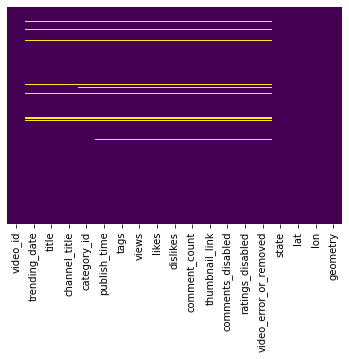

In [184]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [185]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,மகாதேவன்,டி.டி.வி.தினகரன்,பாஸ்கரன்,சுதாகரன்,ராஜராஜன்,குலோத்துங்கன்,டாக்டர்.வெங்கடேஷ் என பலருமே இப்போது ரெய்டு வள...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,அவர் சேர்த்து வைத்த பணமே கண்டமாகி விட்டது.சசி...,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,மகனோடு போயஸ்தோட்டத்தில் தஞ்சமடைந்தார் இளவரசி. ...,புனேயில் எம்பிஏ முடித்து விட்டு பெங்களூருவில்...,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
118,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
120,\n\nOneindia Tamil\nSubscribe for More Videos....,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe :https://www....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38255,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349)
38256,Must-See WWE videos on YouTube: https://goo.gl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
38480,Subscribe to WWE on YouTube: http://bit.ly/1i6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
38481,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)


### Limpieza de datos repetidos

In [186]:
#Visualizacion de registros duplicados
data[data.duplicated(
    subset=["video_id","title","channel_title","publish_time"],
    keep=False)].sort_values(by=["video_id","title","channel_title","publish_time"])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
38191,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Kerala,8.900373,76.569993,POINT (76.56999263 8.900372741)
38314,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38372,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Haryana,28.450006,77.019991,POINT (77.01999101 28.45000633)
38497,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217)
11001,#NAME?,18.09.01,#MahaaNews Sensation: #MaheshKathi Leaves From...,Mahaa News,25,2018-01-07T16:00:29.000Z,"Mahesh Kathi Leaves From Live Debate|""Director...",1436199,20992.0,2088.0,8592.0,https://i.ytimg.com/vi/-Y1AJV-ccdw/default.jpg,FALSO,FALSO,FALSO,Assam,26.749981,94.216667,POINT (94.21666743999999 26.7499809)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chhattisgarh,22.090420,82.159987,POINT (82.15998734 22.09042035)
37925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
37928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tamil Nadu,12.920386,79.150042,POINT (79.15004187 12.92038576)
37931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303)


Se observa que existen varios datos duplicados en el dataset. Se pasará a elminar los datos duplicados y nos quedaremos con el ultimo registro.

#### Eliminación de datos duplicados

In [187]:
data.drop_duplicates(
    subset=["video_id","title","channel_title","publish_time"],
    keep="last", inplace=True)
    

Se utilizó como criterio para eleminar los datos duplicados por el "video_id", "title", "channel_title" y "publish_time". Esto se debe a que si presenta el mismo ID, mismo título y el mismo nombre del canal y misma hora y fecha de publicación se puede decir con seguridad que se trata del mismo video.

### Estandarización de tipo de datos

In [188]:
import datetime

In [189]:
data['publish_time'] = pd.to_datetime(data['publish_time'],errors="coerce")

In [190]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m",errors="coerce")

In [191]:
#data['comments_disabled'].apply( vf_to_boolean )
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']
] = data[['ratings_disabled','comments_disabled',
  'video_error_or_removed']].applymap(
  lambda x : True if x == 'VERDADERO' else False if x == 'FALSO'
  else np.NaN )

In [192]:
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']] = data[['ratings_disabled','comments_disabled', 'video_error_or_removed']].astype("bool")

In [193]:
data['views'] = pd.to_numeric(data['views'],errors="coerce",downcast='integer')
data[['views','likes','dislikes','comment_count']] = data[['views','likes','dislikes','comment_count']].astype('Int64')

In [194]:
# separar en 2 columnas float: geometry?

In [195]:
categories['snippet.title'] = categories['snippet.title'].astype("category")
categories['snippet.title']

0         Film & Animation
1         Autos & Vehicles
2                    Music
3           Pets & Animals
4                   Sports
5             Short Movies
6          Travel & Events
7                   Gaming
8            Videoblogging
9           People & Blogs
10                  Comedy
11           Entertainment
12         News & Politics
13           Howto & Style
14               Education
15    Science & Technology
16                  Movies
17         Anime/Animation
18        Action/Adventure
19                Classics
20                  Comedy
21             Documentary
22                   Drama
23                  Family
24                 Foreign
25                  Horror
26          Sci-Fi/Fantasy
27                Thriller
28                  Shorts
29                   Shows
30                Trailers
Name: snippet.title, dtype: category
Categories (30, object): ['Action/Adventure', 'Anime/Animation', 'Autos & Vehicles', 'Classics', ..., 'Thriller', 'Trailers', 

### Limpieza de datos NA

In [196]:
#Si el dato faltante es el video_id, entonces, se removerán dichas observaciones.

In [197]:
data.dropna(subset = ["video_id"], axis = 0, inplace = True)

#### Hallamos la moda del tamaño de string de videos_id (MEJORAR ESCRITURA)

In [198]:
moda = data['video_id'].astype(str).map(len).mode()
moda

0    11
Name: video_id, dtype: int64

Como se puede observar en el dataset, los registros deberian tener un "video_id" de 11 caracteres. Si se presenta que los datos tienen menor o mayor cantidad de caracteres, estos se deberian evaluar.

#### Mayores a la moda

In [199]:
data[data['video_id'].map(len) > int(moda)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 116 to 38482
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                221 non-null    object             
 1   trending_date           0 non-null      datetime64[ns]     
 2   title                   66 non-null     object             
 3   channel_title           31 non-null     object             
 4   category_id             16 non-null     object             
 5   publish_time            0 non-null      datetime64[ns, UTC]
 6   tags                    7 non-null      object             
 7   views                   0 non-null      Int64              
 8   likes                   0 non-null      Int64              
 9   dislikes                0 non-null      Int64              
 10  comment_count           0 non-null      Int64              
 11  thumbnail_link          0 non-null      o

Como se puede observar todos los datos que tienen un "video_id" mayor a la moda presentan datos incompletos. Ninguno de los datos tiene likes, dislikes, comment_count, etc. Por ende se pasara a su eliminación en el dataset.

##### Volver NA los datos que tengan una longitud de videos_id mayor a la moda

In [200]:
data[data['video_id'].map(len) > int(moda)] = np.nan

Volvemos a eliminar los datos que tengan "video_id" NA

In [201]:
data.dropna(subset = ["video_id"], axis = 0, inplace = True)

Volvemos a comprobar datos faltantes

<AxesSubplot:>

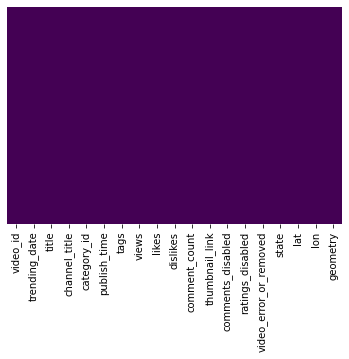

In [202]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [203]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
8113,\nకాగా,NaT,గత కొంతకాలంగా ఉద్యోగం మానేసిన కార్తీక్.. చెడు...,ప్రేమ,పెళ్లి అంటూ సంధ్యారాణిని కార్తీక్ వేధింపులకు ...,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
8324,\nMP,NaT,as TTV. Dinakaran is moving towards the victo...,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Orissa,19.820430,85.900017,POINT (85.90001746 19.82042971)
12585,\nకాగా,NaT,ఇద్దరు పిల్లలు మాత్రం చిన్న చిన్న గాయాలతో బయట...,ఈ ప్రమాదం జరిగి ఇంటి ఇల్లాలు మరణించడంతో ఆ కుట...,దర్యాప్తు చేస్తున్నారు.\nOneindia Telugu\nSub...,NaT,current affairs in India & around the world.\...,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
13284,\nಅಂದ್ಹಾಗೆ,NaT,ಮತ್ತು ಅವರ ಹುಟ್ಟುಹಬ್ಬದ ದಿನಾಂಕವೂ ಯಾರಿಗೂ ಗೊತ್ತಿರ...,66,67 ವಯಸ್ಸು ಎಂದು ಹೇಳುತ್ತಿದ್ದಾರೆ. ಆದ್ರೆ,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Chandigarh,30.719997,76.780006,POINT (76.78000565000001 30.71999697)
13286,\nಇದೀಗ,NaT,ಇದರಲ್ಲಿ ಕಾಶಿನಾಥ್ ಅವರ ಜನ್ಮದಿನಾಂಕ ಮತ್ತು ವಯಸ್ಸಿನ...,ಎಲ್ಲರ ಗಮನ ಸೆಳೆಯುತ್ತಿದೆ.,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
21579,\nCREDITS:,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899)
28346,\nH Raja,NaT,Bharatiya Janata Party has tweeted against Ka...,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Tamil Nadu,12.920386,79.150042,POINT (79.15004187 12.92038576)
29274,\n,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Jammu And Kashmir,34.299959,74.466658,POINT (74.46665849 34.29995933)


#### Menores a la moda

In [204]:
data[data['video_id'].map(len) < int(moda)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
139,#NAME?,2017-11-14,స‌మంత కంట‌త‌డి | Samantha became EMOTIONAL @ S...,Friday Poster,24,2017-11-13 08:59:27+00:00,"స‌మంత కంట‌త‌డి|""Samantha became EMOTIONAL @ Sa...",31052,36,11,2,https://i.ytimg.com/vi/-b0ww7L2MGU/default.jpg,False,False,False,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
178,#NAME?,2017-11-14,कुंभ राशि वालों के लिए 12 नवंबर - 18 नवंबर का ...,Jansatta,25,2017-11-11 09:09:06+00:00,"कुंभ राशि|""Astro""|""rashi""|""कुंभ""|""jansatta""",30659,180,36,3,https://i.ytimg.com/vi/-BcG_jN6DgE/default.jpg,False,False,False,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
194,#NAME?,2017-11-14,"घर में चुपचाप यहाँ रख दे एक लौंग , इतना बरसेगा...",Health Tips for You,26,2017-11-08 12:27:17+00:00,"tona totka|""tone""|""laal kitaab""|""lal kitaab""|""...",743321,2570,1154,294,https://i.ytimg.com/vi/-kj6W27Jj-8/default.jpg,False,False,False,Uttar Pradesh,27.599981,78.050006,POINT (78.05000565 27.59998069)
541,#NAME?,2017-11-16,18 नवम्बर 2017शनि अमावस्या को जरा से काले तिल ...,AstroMitram,22,2017-11-14 05:41:47+00:00,"राशिफल 2017|""rashifal 2017 - YouTube""|""Sun tra...",36956,442,37,29,https://i.ytimg.com/vi/-X33hZ1oTXI/default.jpg,False,False,False,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
603,#NAME?,2017-11-16,BEST MOM EVER- Things you would love to hear f...,Old Delhi Films,24,2017-11-14 06:52:06+00:00,"Mother|""mom""|""best mom""|""best dad ever""|""best ...",20289,1221,154,95,https://i.ytimg.com/vi/-x9Bp5lFyM0/default.jpg,False,False,False,Kerala,8.900373,76.569993,POINT (76.56999263 8.900372741)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37741,#NAME?,2018-06-10,रविवार स्पेशल भजन : भगवान तुम्हारी भक्ति में |...,Sonotek Bhakti,10.0,2018-06-09 23:00:00+00:00,"bhajan bhakti|""ras""|""kirtan""|""sonotek bhakti""|...",159078,860,193,92,https://i.ytimg.com/vi/-IaF6j0BPuM/default.jpg,False,False,False,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38124,#NAME?,2018-06-12,Dhaval Domadiya - Girl Friend VS Best Friend -...,Studio Sangeeta,10.0,2018-06-09 13:45:58+00:00,"dhaval domadiya new video|""dhaval domadiya fun...",284132,5310,277,225,https://i.ytimg.com/vi/-OLs1Sax2c8/default.jpg,False,False,False,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217)
38260,#NAME?,2018-06-13,தனியார் தொலைக்காட்சி நிகழ்ச்சி பங்கேற்பாளர் மீ...,Polimer News,25.0,2018-06-10 06:23:03+00:00,"polimer news|""polimer news live""|""polimer news...",486463,3087,244,678,https://i.ytimg.com/vi/-lUUEs-hBB8/default.jpg,False,False,False,Haryana,28.450006,77.019991,POINT (77.01999101 28.45000633)
38497,#NAME?,2018-06-14,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12 05:44:19+00:00,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217)


##### Datos con video_id == \n?

In [205]:
data[data['video_id'] == "\\n"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 29274 to 29274
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                1 non-null      object             
 1   trending_date           0 non-null      datetime64[ns]     
 2   title                   0 non-null      object             
 3   channel_title           0 non-null      object             
 4   category_id             0 non-null      object             
 5   publish_time            0 non-null      datetime64[ns, UTC]
 6   tags                    0 non-null      object             
 7   views                   0 non-null      Int64              
 8   likes                   0 non-null      Int64              
 9   dislikes                0 non-null      Int64              
 10  comment_count           0 non-null      Int64              
 11  thumbnail_link          0 non-null      o

Se puede observar que los datos presentan demasiados datos nulos. Por ende se pasará a su eliminición en el dataset.

In [206]:
data[data['video_id'] == "\\n"] = np.nan

Se vuelve a eliminar los datos NA

In [207]:
data.dropna(subset = ["video_id"], axis = 0, inplace = True)

##### Datos con video_id == #NAME?

In [208]:
data[data['video_id'] == "#NAME?"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 139 to 38505
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                214 non-null    object             
 1   trending_date           214 non-null    datetime64[ns]     
 2   title                   214 non-null    object             
 3   channel_title           214 non-null    object             
 4   category_id             214 non-null    object             
 5   publish_time            214 non-null    datetime64[ns, UTC]
 6   tags                    214 non-null    object             
 7   views                   214 non-null    Int64              
 8   likes                   214 non-null    Int64              
 9   dislikes                214 non-null    Int64              
 10  comment_count           214 non-null    Int64              
 11  thumbnail_link          214 non-null    o

Como se puede observar los datos que tienen video_id == #NAME?, presentan en su mayoria datos completos en todos los campos excepto 3 en descripción. Por ende, se tomarán en cuenta estos datos para la implementación del proyecto.

##### Comprobamos los datos faltantes

In [209]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
8113,\nకాగా,NaT,గత కొంతకాలంగా ఉద్యోగం మానేసిన కార్తీక్.. చెడు...,ప్రేమ,పెళ్లి అంటూ సంధ్యారాణిని కార్తీక్ వేధింపులకు ...,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
8324,\nMP,NaT,as TTV. Dinakaran is moving towards the victo...,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Orissa,19.820430,85.900017,POINT (85.90001746 19.82042971)
12585,\nకాగా,NaT,ఇద్దరు పిల్లలు మాత్రం చిన్న చిన్న గాయాలతో బయట...,ఈ ప్రమాదం జరిగి ఇంటి ఇల్లాలు మరణించడంతో ఆ కుట...,దర్యాప్తు చేస్తున్నారు.\nOneindia Telugu\nSub...,NaT,current affairs in India & around the world.\...,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
13284,\nಅಂದ್ಹಾಗೆ,NaT,ಮತ್ತು ಅವರ ಹುಟ್ಟುಹಬ್ಬದ ದಿನಾಂಕವೂ ಯಾರಿಗೂ ಗೊತ್ತಿರ...,66,67 ವಯಸ್ಸು ಎಂದು ಹೇಳುತ್ತಿದ್ದಾರೆ. ಆದ್ರೆ,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Chandigarh,30.719997,76.780006,POINT (76.78000565000001 30.71999697)
13286,\nಇದೀಗ,NaT,ಇದರಲ್ಲಿ ಕಾಶಿನಾಥ್ ಅವರ ಜನ್ಮದಿನಾಂಕ ಮತ್ತು ವಯಸ್ಸಿನ...,ಎಲ್ಲರ ಗಮನ ಸೆಳೆಯುತ್ತಿದೆ.,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
21579,\nCREDITS:,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899)
28346,\nH Raja,NaT,Bharatiya Janata Party has tweeted against Ka...,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Tamil Nadu,12.920386,79.150042,POINT (79.15004187 12.92038576)


Por ultimo eliminamos los datos que tengan NA en "publish_time"

In [210]:
data.dropna(subset=["publish_time"],inplace=True)

In [211]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry


### Datos procesados

In [212]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
6,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11 16:41:15+00:00,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
12,Prb_osSVE0M,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,2017-11-13 09:51:59+00:00,"Resnu desai|""actress renu desai""|""pawan kalyan...",156085,716,53,0,https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg,True,False,False,Manipur,24.799971,93.950017,POINT (93.95001705 24.79997072)
13,KHxdrECEsD0,2017-11-14,Peehu Srivastav Performs On Daiya Yeh Main kah...,The Voice India Kids,24,2017-11-11 19:19:13+00:00,"the voice of india|""TVOI""|""the voice of india ...",472413,2611,250,174,https://i.ytimg.com/vi/KHxdrECEsD0/default.jpg,False,False,False,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
16,ep3SLMuRbvg,2017-11-14,TYPES OF STUDENTS- | Elvish Yadav |,Elvish yadav,23,2017-11-13 11:26:02+00:00,"TYPES OF STUDENTS ELVISH YADAV|""elvish yadav""|...",344545,25717,417,2870,https://i.ytimg.com/vi/ep3SLMuRbvg/default.jpg,False,False,False,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
22,1kuJkA9usqg,2017-11-14,"Deivamagal Episode 1387, 13/11/17",VikatanTV,24,2017-11-13 15:00:01+00:00,"deivamagal|""deiva magal""|""deiva magal serial""|...",387221,2159,1214,711,https://i.ytimg.com/vi/1kuJkA9usqg/default.jpg,False,False,False,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291)


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16786 entries, 6 to 38532
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                16786 non-null  object             
 1   trending_date           16786 non-null  datetime64[ns]     
 2   title                   16786 non-null  object             
 3   channel_title           16786 non-null  object             
 4   category_id             16786 non-null  object             
 5   publish_time            16786 non-null  datetime64[ns, UTC]
 6   tags                    16786 non-null  object             
 7   views                   16786 non-null  Int64              
 8   likes                   16786 non-null  Int64              
 9   dislikes                16786 non-null  Int64              
 10  comment_count           16786 non-null  Int64              
 11  thumbnail_link          16786 non-null  o

In [214]:
data.describe()

,views,likes,dislikes,comment_count,lat,lon
count,1.678600e+04,1.678600e+04,1.678600e+04,16786.000000,16786.000000,16786.000000
mean,6.896124e+05,1.457750e+04,9.584727e+02,1484.158585,22.667601,82.139893
std,2.359613e+06,6.645762e+04,1.246829e+04,10283.028423,6.814872,7.456300
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,8.900373,72.636867
25%,8.908075e+04,5.640000e+02,7.000000e+01,47.000000,19.250232,76.569993
50%,2.063745e+05,1.762000e+03,1.950000e+02,196.500000,23.835404,78.570026
75%,5.321182e+05,6.531000e+03,5.960000e+02,708.750000,27.333330,88.616647
max,1.254322e+08,2.912710e+06,1.545017e+06,807558.000000,34.299959,94.216667


In [215]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kind                31 non-null     object  
 1   etag                31 non-null     object  
 2   id                  31 non-null     object  
 3   snippet.channelId   31 non-null     object  
 4   snippet.title       31 non-null     category
 5   snippet.assignable  31 non-null     bool    
dtypes: bool(1), category(1), object(4)
memory usage: 2.4+ KB


### Requerimientos

#### Por Categoría de Videos

In [216]:
data.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'state', 'lat',
       'lon', 'geometry'], dtype=object)

In [217]:
data_cat = data.join(categories.set_index('id'), on='category_id')
data_cat.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
6,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11 16:41:15+00:00,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,...,False,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
12,Prb_osSVE0M,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,2017-11-13 09:51:59+00:00,"Resnu desai|""actress renu desai""|""pawan kalyan...",156085,716,53,...,False,Manipur,24.799971,93.950017,POINT (93.95001705 24.79997072),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...",UCBR8-60-B28hp2BmDPdntcQ,News & Politics,True
13,KHxdrECEsD0,2017-11-14,Peehu Srivastav Performs On Daiya Yeh Main kah...,The Voice India Kids,24,2017-11-11 19:19:13+00:00,"the voice of india|""TVOI""|""the voice of india ...",472413,2611,250,...,False,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
16,ep3SLMuRbvg,2017-11-14,TYPES OF STUDENTS- | Elvish Yadav |,Elvish yadav,23,2017-11-13 11:26:02+00:00,"TYPES OF STUDENTS ELVISH YADAV|""elvish yadav""|...",344545,25717,417,...,False,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
22,1kuJkA9usqg,2017-11-14,"Deivamagal Episode 1387, 13/11/17",VikatanTV,24,2017-11-13 15:00:01+00:00,"deivamagal|""deiva magal""|""deiva magal serial""|...",387221,2159,1214,...,False,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


##### 1. ¿Qué categorías de videos son las de mayor tendencia?

<AxesSubplot:xlabel='snippet.title', ylabel='views'>

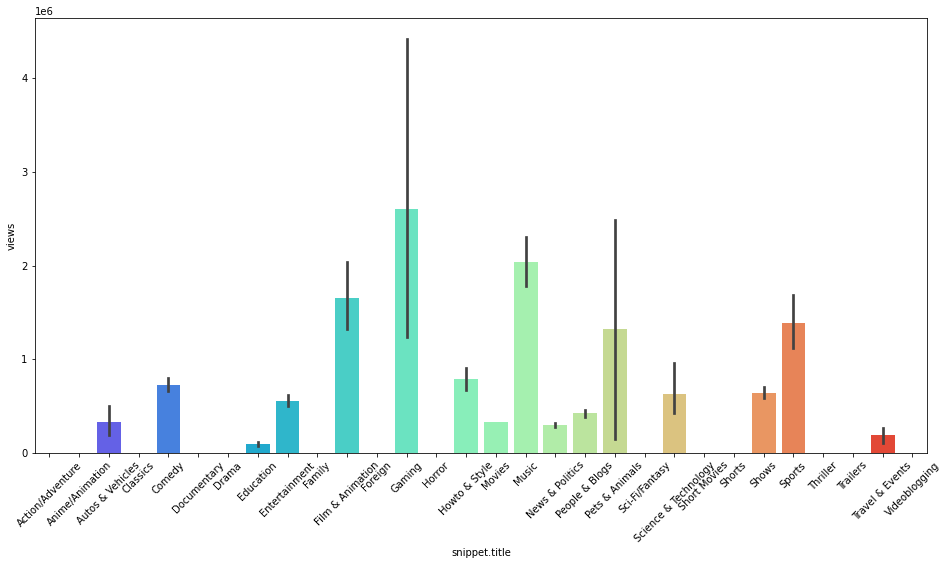

In [218]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x="snippet.title", y="views", data=data_cat, palette='rainbow')

Se utilizó la cantidad de vistas como el indicador de tendencia. Como se observa en el gráfico, las tres primeras categorías con mayor tendencia son: Gaming, Music, Family

##### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

##### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

#### Por el tiempo transcurrido

##  Visualizar los Datos